<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Car_Sharing_Company_Project/blob/master/Moringa_Data_Science_Prep_W3_Independent_Project_2019_07_Precy_Mae_Python_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 Moringa Prep independent Project

**Project**

In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

**Research Question**

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

**Bonus Questions**

1.   What is the most popular hour for returning cars?
2.   What station is the most popular?
Overall?
3.   The most popular picking hour?
4.   What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
Overall?At the most popular picking hour?
5.   Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

**Datasets Provided**


*   http://bit.ly/autolib_dataset
*   https://drive.google.com/a/moringaschool.com/file/d/13DXF2CFWQLeYxxHFekng8HJnH_jtbfpN/view?usp=sharing



# Importing our Libraries

In [0]:
import numpy as np
#
import pandas as pd

# Reading our dataset from csv

In [0]:
# Lets read our dataset from CSV and create a dataframe
#
init_station= pd.read_csv("http://bit.ly/autolib_dataset", header=0)

# Previewing our dataset



In [0]:
# Lets preview our dataset
#
init_station.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14


# Accesing information about our dataset

In [0]:
# Lets preview information on our dataset
init_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

# Cleaning our dataset

Let us perform data cleaning procedures below providing a documentation for our actions and reasons. We will perform as many data cleaning procedures as we think suitable for the various dimensions of data.

# Validity

In [0]:
# Procedure 1
# Data cleaning action:Messy column names 
# Explanation:
#
init_station. columns= init_station. columns. str.strip().str.lower().str.replace(' ','')
init_station.head(3)

,address,cars,bluecarcounter,utilibcounter,utilib1.4counter,chargeslots,chargingstatus,city,displayedcomment,id,kind,geopoint,postalcode,publicname,rentalstatus,scheduledat,slots,stationtype,status,subscriptionstatus,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14


In [182]:
# Procedure 2: Irrelevant data
# Data cleaning action: Dropping columns;Charge slots, Charging status,Displayed comment, Kind, Geo point, Public name, Rental status, Sceduled at, Slots, Station type, Status, Subscription status, Minute, day
# Explanation: We will not be needing the named columns for our project
#
station1= init_station. drop( columns= ['year','month','displayedcomment','kind','geopoint','publicname','rentalstatus','scheduledat','slots','stationtype','status','subscriptionstatus','minute','day','chargeslots', 'chargingstatus'])
station1.head(3)

,address,cars,bluecarcounter,utilibcounter,utilib1.4counter,city,id,postalcode,hour
0,2 Avenue de Suffren,0,0,0,0,Paris,paris-suffren-2,75015,11
1,145 Rue Raymond Losserand,6,6,0,0,Paris,paris-raymondlosserand-145,75014,7
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,20


# Accuracy


In [183]:
# Procedure 1
# Data cleaning action: Make sure that column cars= blue car counter+ utilib counter + utilib1.4 counter
# Explanation: There are some values that do not reflect the actual sum
#
station1['cars'] = station1['bluecarcounter'] + station1['utilib1.4counter']+ station1['utilibcounter']
station1.head(3)

,address,cars,bluecarcounter,utilibcounter,utilib1.4counter,city,id,postalcode,hour
0,2 Avenue de Suffren,0,0,0,0,Paris,paris-suffren-2,75015,11
1,145 Rue Raymond Losserand,6,6,0,0,Paris,paris-raymondlosserand-145,75014,7
2,2 Avenue John Fitzgerald Kennedy,5,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,20


# Completeness

check out and deal with missing values

In [184]:
# Procedure 1
# Data cleaning action: Find missing values
# Explanation: So that we can get rid of missing values
#
station1.isnull().sum()
# we have no missing values

address             0
cars                0
bluecarcounter      0
utilibcounter       0
utilib1.4counter    0
city                0
id                  0
postalcode          0
hour                0
dtype: int64

# Consistency


In [185]:
# Procedure 1
# Data cleaning action: Drop duplicates
# Explanation: To avoid repetition in our dataset
#
station1_non_duplicates= station1.drop_duplicates()
station1_non_duplicates. head(3)

,address,cars,bluecarcounter,utilibcounter,utilib1.4counter,city,id,postalcode,hour
0,2 Avenue de Suffren,0,0,0,0,Paris,paris-suffren-2,75015,11
1,145 Rue Raymond Losserand,6,6,0,0,Paris,paris-raymondlosserand-145,75014,7
2,2 Avenue John Fitzgerald Kennedy,5,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,20


# Uniformity

In [187]:
# Procedure 1
# Data cleaning action: Renaming our columns
# Explanation: To make it easy to understand
#
station1_non_duplicates.columns= ['address','cars','bluecar','utilib','utilib1.4','city','id','postalcode','hour']
station1_non_duplicates.head(3)

,address,cars,bluecar,utilib,utilib1.4,city,id,postalcode,hour
0,2 Avenue de Suffren,0,0,0,0,Paris,paris-suffren-2,75015,11
1,145 Rue Raymond Losserand,6,6,0,0,Paris,paris-raymondlosserand-145,75014,7
2,2 Avenue John Fitzgerald Kennedy,5,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,20


# Exporting a cleaned dataset

In [0]:
# Procedure 1 
# Explanation: Lets export our dataframe to a csv file
#
station1_non_duplicates.to_csv("car_dealer.csv",index= False)

# Answering Questions

In [189]:
# Read our csv file
df= pd.read_csv('car_dealer.csv')
df.head()

,address,cars,bluecar,utilib,utilib1.4,city,id,postalcode,hour
0,2 Avenue de Suffren,0,0,0,0,Paris,paris-suffren-2,75015,11
1,145 Rue Raymond Losserand,6,6,0,0,Paris,paris-raymondlosserand-145,75014,7
2,2 Avenue John Fitzgerald Kennedy,5,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,20
3,51 Rue EugÃ¨ne OudinÃ©,4,3,1,0,Paris,paris-eugeneoudine-51,75013,4
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,paris-portedechamperret-6,75017,17


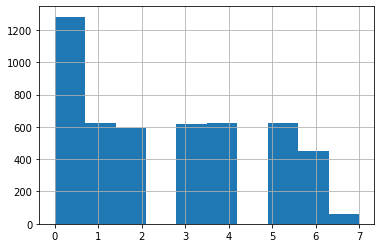

In [190]:
# Checking for outliers
# 
df.cars.hist()

In [207]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

df1=df[(df.city=='Paris')]
df1
x =df1.pivot_table(['bluecar'],['hour'],aggfunc= 'sum')
y=x.reset_index()
z= y.sort_values(by=['bluecar'],ascending= True)
z.head(5)
# The most popular hour for picking up the Bluecar in the city of Paris on April 2018 was the 20th hour with 147 blue cars as shown below.
# This is because the car sharing company recorded the least number of cars in the station.

,hour,bluecar
20,20,147
14,14,163
23,23,186
17,17,187
18,18,191


In [208]:
#What is the most popular hour for returning cars?
#
p= df.pivot_table(['cars'],['hour'],aggfunc= 'sum')
q=p.reset_index()
r= q.sort_values(by=['cars'],ascending= False)
r.head(5)
# The most popular hour for returning cars is the 6th hour as it records the highest number of cars in the station

,hour,cars
6,6,653
3,3,599
7,7,583
5,5,579
2,2,573


In [209]:
#What station is the most popular Overall?
#
s= df.pivot_table(['cars'],['address'],aggfunc= 'sum')
q=s.reset_index()
t= q.sort_values(by=['cars'],ascending= False)
t.head(5)
# 8Avenue de la Porte de Montrouge is the most popular station recording a total of 50 cars recorded

,address,cars
1015,8 Avenue de la Porte de Montrouge,50
651,32 rue Robert Marchand,50
282,16 avenue GalilÃ©e,49
450,20 Avenue Lombard,48
640,31 avenue de la Division Leclerc,46


In [210]:
#The most popular picking hour?
#
a= df.pivot_table(['cars'],['hour'],aggfunc= 'sum')
b=a.reset_index()
c=b.sort_values(by=['cars'],ascending= True)
c.head()
# The most popular picking hour is the 19th hour as it records the least amount of cars overall

,hour,cars
19,19,422
20,20,433
23,23,442
14,14,461
18,18,463


In [211]:
#What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code? 
#Overall?At the most popular picking hour?
#
u= df.pivot_table(['bluecar'],['postalcode'],aggfunc= 'sum')
v=u.reset_index()
w= v.sort_values(by=['bluecar'],ascending= False)
w.head()

,postalcode,bluecar
14,75015,600
15,75016,594
16,75017,529
30,92000,454
19,75020,442


In [212]:
# Lets find the postal code of 8 Avenue de la Porte de Montrouge
df.loc[df['address'] == '8 Avenue de la Porte de Montrouge'].head(3)
# Unfortunately, 8 Avenue de la Porte de Montrouge does not belong to the most popular postal code(75015) but belongs to postal code(75014)

,address,cars,bluecar,utilib,utilib1.4,city,id,postalcode,hour
122,8 Avenue de la Porte de Montrouge,4,3,0,1,Paris,paris-portedemontrouge-8,75014,19
194,8 Avenue de la Porte de Montrouge,2,1,1,0,Paris,paris-portedemontrouge-8,75014,16
360,8 Avenue de la Porte de Montrouge,1,0,0,1,Paris,paris-portedemontrouge-8,75014,22


In [213]:
# Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?
# For utilib, 
#
m= df.pivot_table(['utilib'],['postalcode'],aggfunc= 'sum')
g=m.reset_index()
o= g.sort_values(by=['utilib'],ascending= False)
o.head(5)

,postalcode,utilib
14,75015,20
16,75017,20
15,75016,20
19,75020,13
12,75013,12


In [214]:
# For utilib1.4
#
h= df.pivot_table(['utilib1.4'],['postalcode'],aggfunc= 'sum')
j=h.reset_index()
f= j.sort_values(by=['utilib1.4'],ascending= False)
f.head(5)
# The most popular postal code for the utilib car is similar to that of the bluecar (75015).
# However, the most popular postal code for the utilib 1.4 car is (75017)

,postalcode,utilib1.4
16,75017,40
14,75015,34
18,75019,32
19,75020,26
15,75016,25
